In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/train_prepared.csv')

In [3]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,5,3,65.0,8450.0,1,0,3,3,4,...,0.0,0.0,0,0,0,0.0,2.0,2008.0,8,4
1,1,0,3,80.0,9600.0,1,0,3,3,2,...,0.0,0.0,0,0,0,0.0,5.0,2007.0,8,4
2,2,5,3,68.0,11250.0,1,0,0,3,4,...,0.0,0.0,0,0,0,0.0,9.0,2008.0,8,4
3,3,6,3,60.0,9550.0,1,0,0,3,0,...,0.0,0.0,0,0,0,0.0,2.0,2006.0,8,0
4,4,5,3,84.0,14260.0,1,0,0,3,2,...,0.0,0.0,0,0,0,0.0,12.0,2008.0,8,4


In [4]:
df.shape

(1460, 79)

In [5]:
ncategories = sum(df.dtypes == int)
ncategories

44

In [6]:
target = pd.read_csv('data/train_target.csv')

In [7]:
target.shape

(1460, 1)

# Exploration
The dataset is massive, so let's pick a few columns to get started. We look for features that explain the the sell prices, so these features should be correlated. One way to find them is to plot the correlation matrix and look for correlated variables.

In [8]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

## Using correlation to identify useful features

In [28]:
def plot_corr(df, ax=None, log=False):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    """
    corr = df.corr()
    if log:
        corr = np.log(np.abs(corr))
    diag = np.diag(np.diagonal(corr))
    if ax is None:
        ax = plt.gca()
    mat = corr - diag
    ax.matshow(mat)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns, rotation=0);
    plt.axis('tight')
    return corr - diag


'YrSold'

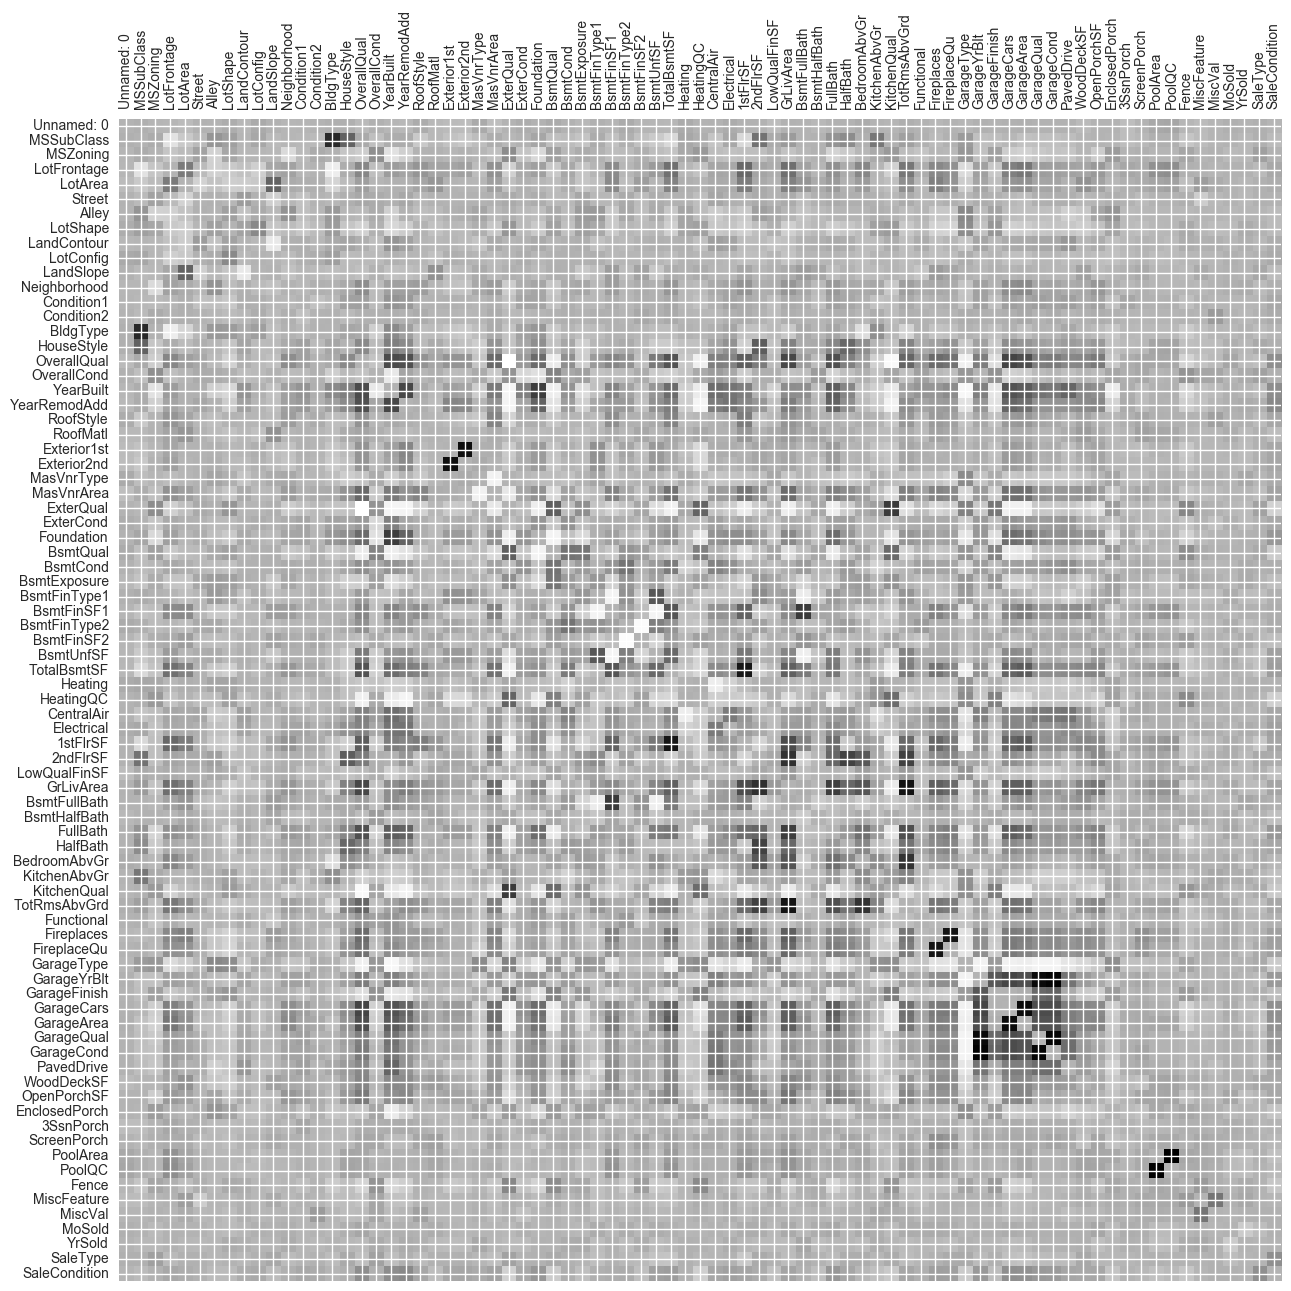

In [33]:
plt.figure(0, figsize=(15,15))
plt.clf()
corr = plot_corr(df);

In [36]:
corr.describe()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.003156,0.008699,-0.026727,0.049249,0.039844,0.001936,-0.011397,-0.036590,-0.000968,-0.013073,...,0.019658,0.033673,0.034150,-0.021447,-0.001424,0.004009,0.006318,-0.007003,-0.000952,0.027845
std,0.024450,0.138460,0.095934,0.150089,0.117066,0.048703,0.082971,0.101300,0.070181,0.047964,...,0.049713,0.114889,0.115635,0.097209,0.058613,0.048001,0.030952,0.032614,0.045922,0.086358
min,-0.051071,-0.318302,-0.308908,-0.407363,-0.205721,-0.197131,-0.191736,-0.226062,-0.374267,-0.174500,...,-0.082864,-0.067251,-0.057634,-0.224810,-0.161099,-0.074932,-0.145721,-0.145721,-0.118436,-0.188571
25%,-0.009082,-0.051400,-0.078265,-0.010189,-0.020328,-0.017544,-0.053969,-0.112385,-0.030786,-0.034872,...,-0.018440,-0.012133,-0.013294,-0.088964,-0.034375,-0.016849,-0.010582,-0.028039,-0.032443,-0.024853
50%,0.002157,-0.006023,-0.016471,0.048617,0.020423,0.006663,-0.015717,-0.038118,0.000000,-0.010437,...,0.019089,0.015858,0.014563,-0.013559,-0.003922,-0.003518,0.009767,-0.009819,0.001677,0.028709
75%,0.015030,0.033822,0.010507,0.112416,0.098614,0.024298,0.026265,0.030038,0.032816,0.002773,...,0.052194,0.058903,0.050095,0.030494,0.021428,0.011597,0.026159,0.009876,0.017054,0.071684
max,0.066509,0.718692,0.200536,0.413175,0.436868,0.115995,0.226642,0.221102,0.161622,0.221102,...,0.184530,0.938402,0.938402,0.235974,0.334671,0.334671,0.071255,0.067049,0.184067,0.221687


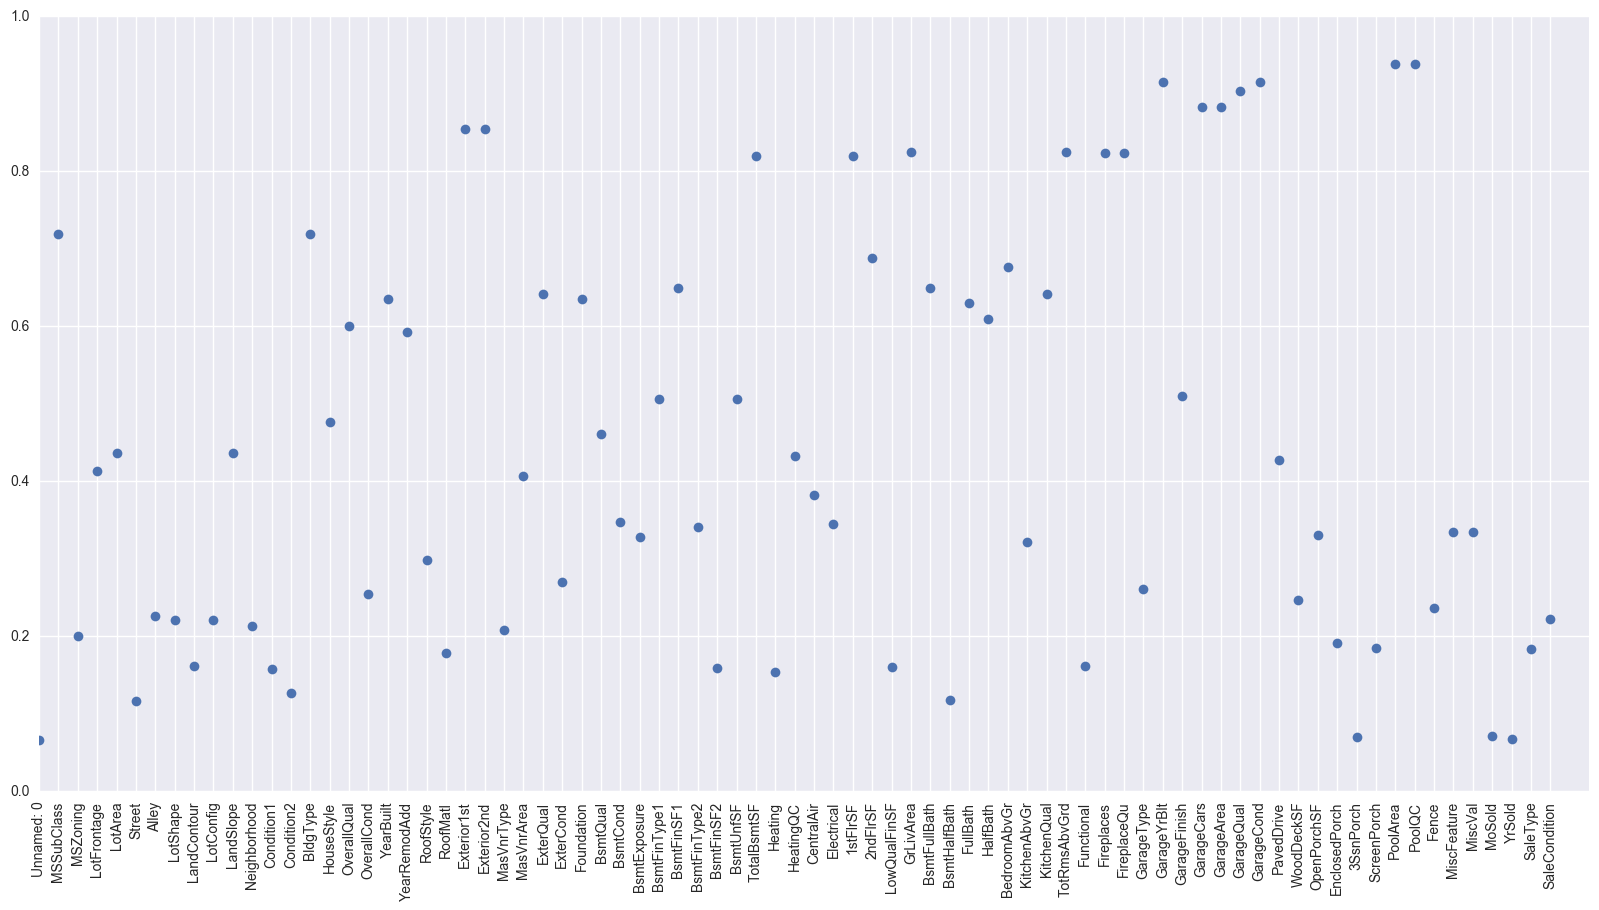

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(corr.max().values, 'o')
plt.xticks(range(corr.shape[1]), corr.columns, rotation=90);
#ax.set_xticklabels(corr.columns, rotation=90)

In [79]:
hcorr_columns = corr.loc[:, corr.max() > 0.63].columns
sorted(hcorr_columns)

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BldgType',
 'BsmtFinSF1',
 'BsmtFullBath',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'MSSubClass',
 'PoolArea',
 'PoolQC',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt']

In [80]:
dfc = df[hcorr_columns]
dfc.head()

,MSSubClass,BldgType,YearBuilt,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PoolArea,PoolQC
0,5,0,2003.0,12,13,2,2,706.0,856.0,856.0,...,8.0,0.0,0,2003.0,2.0,548.0,5,5,0.0,0
1,0,0,1976.0,8,8,3,1,978.0,1262.0,1262.0,...,6.0,1.0,5,1976.0,2.0,460.0,5,5,0.0,0
2,5,0,2001.0,12,13,2,2,486.0,920.0,920.0,...,6.0,1.0,5,2001.0,2.0,608.0,5,5,0.0,0
3,6,0,1915.0,13,15,3,0,216.0,756.0,961.0,...,7.0,1.0,3,1998.0,3.0,642.0,5,5,0.0,0
4,5,0,2000.0,12,13,2,2,655.0,1145.0,1145.0,...,9.0,1.0,5,2000.0,3.0,836.0,5,5,0.0,0


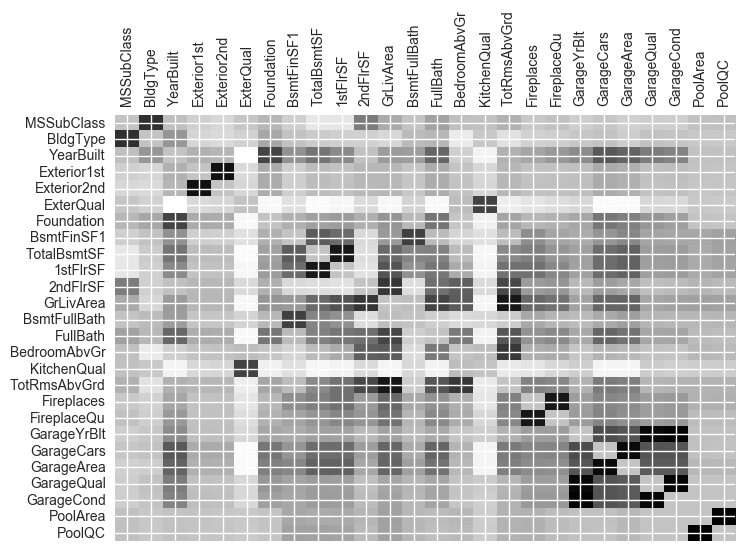

In [81]:
plot_corr(dfc);

## Pick important features

In [ ]:
important_columns = ['Neighborhood', 'YearBuilt', 'OverallQual', 'OverallCond', 
                     'ExterQual', 'ExterCond', 'MSSubClass','MSZoning','HeatingQC',
                     'TotRmsAbvGrd','GarageArea','GarageCond','Fence','GrLivArea']
dfi = df[important_columns]


## Looks at some numerical columns

In [ ]:
isnum = dfi.dtypes == float
dfinum = dfi.loc[:, isnum]
dfinum.shape

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
from itertools import chain
for ax, col in zip(chain.from_iterable(axes), dfinum.columns):
    sns.boxplot(dfinum[col], ax=ax)
plt.tight_layout();

In [ ]:
sns.pairplot(dfi.loc[:, isnum])

## Look at the target

In [ ]:
sns.distplot(target / 1000);

## Compare our numerical colums with the target

In [ ]:
dfit = dfi.copy()
dfit['target'] = target / 1000

In [ ]:
sns.pairplot(dfit, y_vars=dfinum.columns, x_vars=['target'], size=5)

## Conditional plots

Next step is to facet our plots using categorical data. Let's look for the categorical features that have got only a few categories.

In [ ]:
dficat = dfi.loc[:, ~isnum]
dficat.shape

In [ ]:
categories = {}
for col in dficat.columns:
    cats = dficat[col].unique()
    categories[col] = len(cats)

In [ ]:
categories

Let's try faceting with the 'ExterQual' category.

In [ ]:
for category in list(categories.keys()):
    if categories[category] > 6:
        continue
    fig, axes = plt.subplots(len(dfinum.columns) // 2, 2, figsize=(10,10))
    g = sns.FacetGrid(dfit, hue=category, size=5)
    for feature, ax in zip(dfinum.columns, chain.from_iterable(axes)):
        g.map(ax.scatter, feature, 'target', alpha=0.7)
        ax.set(xlabel=feature, ylabel='target')
        ax.legend(loc='upper left')
    plt.close(g.fig)
    fig.suptitle(category)
    #plt.tight_layout()


So exterior quality, heating QC, and MSZoning seem to be the most helpful categories. Let's see if we can confirm that using more advanced visualisations.

## Not very helpful advanced visualizations

In [ ]:
import pandas.tools.plotting as pdp

In [ ]:
pdp.radviz(dfi, 'HeatingQC')  # not very helpful

In [ ]:
pdp.andrews_curves(dfi, 'HeatingQC')  # not very helpful

In [ ]:
pdp.radviz(dfi, 'ExterQual')  # not very helpful

## Reduce dimensionality using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x1, x2, x3, x4, x5 = pca.fit(dfi).transform(dfi).T
dfpca = pd.DataFrame(data={'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'target':target})
#sns.FacetGrid(dfpca, hue='Name', size=5).map(plt.scatter, 'PCA1', 'PCA2').add_legend()

In [ ]:
xlabels = ['x' + str(i + 1) for i in range(5)]
components = pd.DataFrame(data=pca.components_, columns=dfi.columns, index=xlabels)
components

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12, 6), sharey=True)
components.loc['x1'].plot(kind='bar', ax=axes[0])
components.loc['x2'].plot(kind='bar', ax=axes[1])
axes[0].set_xticklabels(components.columns, rotation=30);
axes[1].set_xticklabels(components.columns, rotation=30);

In [ ]:
plt.stem(pca.explained_variance_, basefmt='')
#plt.xlim([-0.5, 1.5])
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(['x' + str(i + 1) for i in range(5)])
plt.xlabel('PCA directions')
plt.ylabel('PCA explained variance')